In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Working with aggregation data

In [71]:
aggregation_data = pd.read_csv('Aggregation.txt', sep="\t", header=None)

In [72]:
aggregation_data.columns = ["N", "K", "D"]

_plot N vs K in scatterplot_

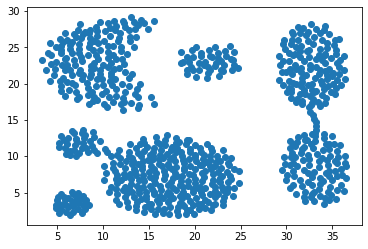

In [73]:
plt.scatter(aggregation_data['N'],aggregation_data['K'])

**Importing DBSCAN and required library**

In [74]:
from sklearn.cluster import DBSCAN 

In [75]:
X = aggregation_data.values[:,:2]

In [76]:
db = DBSCAN(eps=2, min_samples=10)

In [77]:
db.fit(X)

DBSCAN(algorithm='auto', eps=2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=10, n_jobs=None, p=None)

In [78]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool) 
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_ 

__Number of clusters in labels, ignoring noise if present.__

In [79]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) 

In [80]:
n_clusters_

5

**Plot Results Graphically**

In [81]:
unique_labels = set(labels) 
colors = ['y', 'b', 'g', 'r'] 


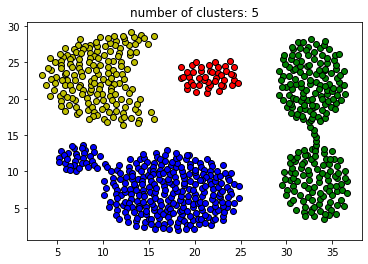

In [82]:
for k, col in zip(unique_labels, colors): 
    if k == -1: 
        # Black used for noise. 
        col = 'k'
  
    class_member_mask = (labels == k) 
  
    xy = X[class_member_mask & core_samples_mask] 
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, 
                                      markeredgecolor='k',  
                                      markersize=6) 
  
    xy = X[class_member_mask & ~core_samples_mask] 
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, 
                                      markeredgecolor='k', 
                                      markersize=6) 
  
plt.title('number of clusters: %d' %n_clusters_) 
plt.show() 